# **CRISP-DM Framework Outline for CKD Prediction Study**  


## **1. Business Understanding**  
### Defining the Research Problem and Objectives
Chronic Kidney Disease (CKD) is a progressive condition characterized by the gradual loss of kidney function over time. Early identification of CKD progression is crucial for timely medical interventions, which can slow disease progression and improve patient outcomes. Traditional methods for predicting CKD progression rely on clinical expertise and standard diagnostic tests, but these approaches can be limited by subjectivity, delayed diagnoses, and variability in patient responses to treatment.

The objective of this study is to develop a machine learning-based predictive model that can accurately forecast the progression of CKD in patients based on clinical and laboratory data. By leveraging machine learning, the study aims to identify patterns in patient health records that may indicate faster or slower disease progression, allowing for better risk stratification and treatment planning.

### Understanding the Impact of CKD and Its Progression
CKD is a major global health concern, affecting millions of individuals and placing a significant burden on healthcare systems. The disease is often asymptomatic in its early stages, leading to late diagnoses when kidney damage is already severe. Patients with CKD progress through five stages, with the final stage (End-Stage Renal Disease, ESRD) requiring dialysis or kidney transplantation. Predicting CKD progression is essential for:

###  Identifying high-risk patients early.
Adjusting treatment plans to slow disease progression.
Allocating healthcare resources more effectively.
Advancements in machine learning provide an opportunity to enhance predictive accuracy by analyzing complex interactions within clinical datasets, offering a data-driven approach to CKD management.

### Justifying the Need for a Machine Learning-Based Predictive Model
Machine learning models offer several advantages over traditional statistical approaches in predicting CKD progression:

- Improved Accuracy – Machine learning algorithms can detect subtle patterns in clinical data that may be missed by conventional methods.
- Automation – The model can provide real-time predictions, assisting healthcare professionals in decision-making.
Personalized Predictions – By analyzing patient-specific data, machine learning models can predict individualized disease trajectories.
- Scalability – A trained model can process large amounts of patient data efficiently, making it suitable for widespread clinical use.
Given the increasing prevalence of CKD and the need for better early-warning systems, a machine learning-based predictive model will contribute significantly to proactive CKD management, potentially reducing complications and improving patient outcomes.

## **2. Data Understanding  
- Collect and explore clinical and environmental datasets.  
- Identify key features (clinical indicators, geographic exposure, demographic factors).  
- Perform exploratory data analysis (EDA) to assess distributions, correlations, and data quality.  


Here is a table summarizing the dataset features, their abbreviations, descriptions, and data types:  

| Feature Name        | Abbreviation | Description                                              | Data Type |  
|-------------------------|-----------------|--------------------------------------------------------------|--------------|  
| ID                 | `id`            | Unique identifier for each patient                          | `int64`      |  
| **Age**                | `age`           | Age of the patient (years)                                  | `float64`    |  
| **Blood Pressure**      | `bp`            | Diastolic blood pressure (mmHg)                             | `float64`    |  
| **Specific Gravity**    | `sg`            | Urine concentration measurement                             | `float64`    |  
| **Albumin**            | `al`            | Albumin levels in urine (0-5 scale)                         | `float64`    |  
| **Sugar**              | `su`            | Sugar levels in urine (0-5 scale)                           | `float64`    |  
| **Red Blood Cells**     | `rbc`           | Red blood cell condition (`normal`, `abnormal`)             | `object`     |  
| **Pus Cells**          | `pc`            | Pus cell condition (`normal`, `abnormal`)                   | `object`     |  
| **Pus Cell Clumps**    | `pcc`           | Presence of pus cell clumps (`present`, `not present`)      | `object`     |  
| **Bacteria**           | `ba`            | Presence of bacteria in urine (`present`, `not present`)    | `object`     |  
| **Blood Glucose Random** | `bgr`         | Random blood glucose levels (mg/dL)                         | `float64`    |  
| **Blood Urea**         | `bu`            | Blood urea levels (mg/dL)                                   | `float64`    |  
| **Serum Creatinine**   | `sc`            | Serum creatinine levels (mg/dL)                             | `float64`    |  
| **Sodium**            | `sod`           | Sodium concentration in blood (mEq/L)                       | `float64`    |  
| **Potassium**         | `pot`           | Potassium concentration in blood (mEq/L)                    | `float64`    |  
| **Hemoglobin**        | `hemo`          | Hemoglobin level in blood (g/dL)                            | `float64`    |  
| **Packed Cell Volume** | `pcv`           | Ratio of red blood cells in total blood volume              | `object`     |  
| **White Blood Cell Count** | `wc`       | White blood cell count (cells/cumm)                         | `object`     |  
| **Red Blood Cell Count** | `rc`         | Red blood cell count (millions/cmm)                         | `object`     |  
| **Hypertension**      | `htn`           | Presence of hypertension (`yes`, `no`)                      | `object`     |  
| **Diabetes Mellitus** | `dm`            | Presence of diabetes (`yes`, `no`)                          | `object`     |  
| **Coronary Artery Disease** | `cad`     | Presence of coronary artery disease (`yes`, `no`)           | `object`     |  
| **Appetite**          | `appet`         | Appetite condition (`good`, `poor`)                         | `object`     |  
| **Pedal Edema**       | `pe`            | Swelling in legs (`yes`, `no`)                              | `object`     |  
| **Anemia**            | `ane`           | Presence of anemia (`yes`, `no`)                            | `object`     |  
| **Classification**    | `classification` | CKD status (`ckd`, `notckd`)                                | `object`     |  
| **Glomerular Filtration Rate** | `gfr` | Estimated GFR (mL/min/1.73m²)                               | `float64`    |  
| **CKD Stage**         | `ckd_stage`     | CKD stage classification (1–5)                              | `int64`      |  



In [1]:
# Data Handling and Preprocessing
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For basic plots
import seaborn as sns  # For advanced statistical visualizations
import plotly.express as px  # For interactive visualizations

# Machine Learning and Model Training
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting and validating data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # One of the ML models
from xgboost import XGBClassifier  # XGBoost model
from lightgbm import LGBMClassifier  # LightGBM model
from catboost import CatBoostClassifier  # CatBoost model
from sklearn.svm import SVC  # Support Vector Classifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Handling Class Imbalance (if needed)
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Suppress unnecessary warnings


## Import Datasets

In [9]:
## Import Datasets
df = pd.read_csv('../Datasets/1/ckd_stages_dataset.csv')

df.head(100)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.643701,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,no,no,no,good,no,no,ckd,134.234408,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,NaN,no,yes,no,poor,no,yes,ckd,34.220303,3
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.298909,4
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.095393,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,62.0,90.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,yes,no,no,good,yes,yes,ckd,62.067544,1
96,96,60.0,80.0,1.010,1.0,1.0,NaN,normal,notpresent,notpresent,...,NaN,no,yes,yes,poor,no,no,ckd,21.256464,4
97,97,65.0,60.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,4.0,yes,yes,no,poor,yes,no,ckd,26.288575,4
98,98,50.0,140.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,2.3,yes,yes,no,poor,no,yes,ckd,7.883246,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

#### **Observations:**  
- Several features have **missing values**, with the highest missingness in `rbc` (**38%**), `rc` (**32.5%**), and `wc` (**26.25%**).  
- Some numerical features (`pcv`, `wc`, `rc`) are incorrectly stored as **objects** instead of **floats**.  
- Categorical features (`rbc`, `pc`, `pcc`, etc.) need **encoding** for machine learning.  
- The target variable (`ckd_stage`) is **fully available**, allowing for CKD staging prediction.  

#### **Steps to Take:**  
✔ **Handle missing values** (impute or drop based on missing percentage).  
✔ **Convert object-based numerical features** (`pcv`, `wc`, `rc`) to `float64`.  
✔ **Encode categorical variables** (`rbc`, `pc`, `htn`, etc.) for modeling.  



In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000000,99.750000,199.500000,299.250000,399.000000
age,391.0,51.483376,17.169714,2.000000,42.000000,55.000000,64.500000,90.000000
bp,388.0,76.469072,13.683637,50.000000,70.000000,80.000000,80.000000,180.000000
sg,353.0,1.017408,0.005717,1.005000,1.010000,1.020000,1.020000,1.025000
al,354.0,1.016949,1.352679,0.000000,0.000000,0.000000,2.000000,5.000000
su,351.0,0.450142,1.099191,0.000000,0.000000,0.000000,0.000000,5.000000
bgr,356.0,148.036517,79.281714,22.000000,99.000000,121.000000,163.000000,490.000000
bu,381.0,57.425722,50.503006,1.500000,27.000000,42.000000,66.000000,391.000000
sc,383.0,3.072454,5.741126,0.400000,0.900000,1.300000,2.800000,76.000000
sod,313.0,137.528754,10.408752,4.500000,135.000000,138.000000,142.000000,163.000000


### **Commentary on the Summary Statistics**  

#### **Observations:**  
1️⃣ **Age (`age`)**:  
   - Mean age: **51.48 years**  
   - Minimum: **2 years**, Maximum: **90 years** → Unusually low value (**outlier**) detected.  
   - Median (`50%`): **55 years**, suggesting **right-skewed distribution**.  

2️⃣ **Blood Pressure (`bp`)**:  
   - Mean: **76.47 mmHg**, with a high maximum (**180 mmHg**).  
   - Median (`50%`): **80 mmHg**, suggesting a few **low outliers**.  

3️⃣ **Specific Gravity (`sg`)**:  
   - Mean: **1.0174**, close to normal **(1.005 - 1.025 range)**.  
   - Values are within expected urine concentration levels.  

4️⃣ **Albumin (`al`)** and **Sugar (`su`)**:  
   - Albumin (`al`): **Highly skewed**, 50% of patients have **0**, but maximum value is **5**.  
   - Sugar (`su`): Similar pattern, mostly **0**, but some **high outliers**.  

5️⃣ **Blood Glucose (`bgr`)**:  
   - Mean: **148 mg/dL**, Maximum: **490 mg/dL** → **Extreme outliers detected**.  
   - Median (`50%`): **121 mg/dL**, suggesting skewed distribution.  

6️⃣ **Serum Creatinine (`sc`)**:  
   - Mean: **3.07 mg/dL**, but the maximum value is **76 mg/dL** → **Extreme outlier**.  
   - The median (`1.3 mg/dL`) is within a normal range.  

7️⃣ **Sodium (`sod`) and Potassium (`pot`)**:  
   - Sodium (`sod`): Mean **137.5**, mostly within the normal range (**135-145 mEq/L**).  
   - Potassium (`pot`): Mean **4.63**, with a high max value (**47**), suggesting **data entry errors**.  

8️⃣ **Hemoglobin (`hemo`)**:  
   - Mean: **12.52 g/dL**, mostly within normal ranges.  

9️⃣ **Glomerular Filtration Rate (`gfr`)**:  
   - Mean: **56.59 mL/min**, which aligns with **Stage 3 CKD**.  
   - Minimum: **0.37**, Maximum: **152**, showing high variability.  

🔟 **CKD Stage (`ckd_stage`)**:  
   - Mean: **2.48**, mostly distributed in early-to-moderate CKD.  

---

### **Steps to Take:**  
✔ **Handle outliers** in `bgr`, `sc`, `pot`, and `age`.  
✔ **Investigate extreme values (76 mg/dL creatinine, 490 mg/dL glucose, 47 mEq/L potassium).**  
✔ **transforming skewed features (`al`, `su`, `sc`)** to improve model performance.  



In [12]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features


['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [13]:
numerical_features


['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'gfr',
 'ckd_stage']

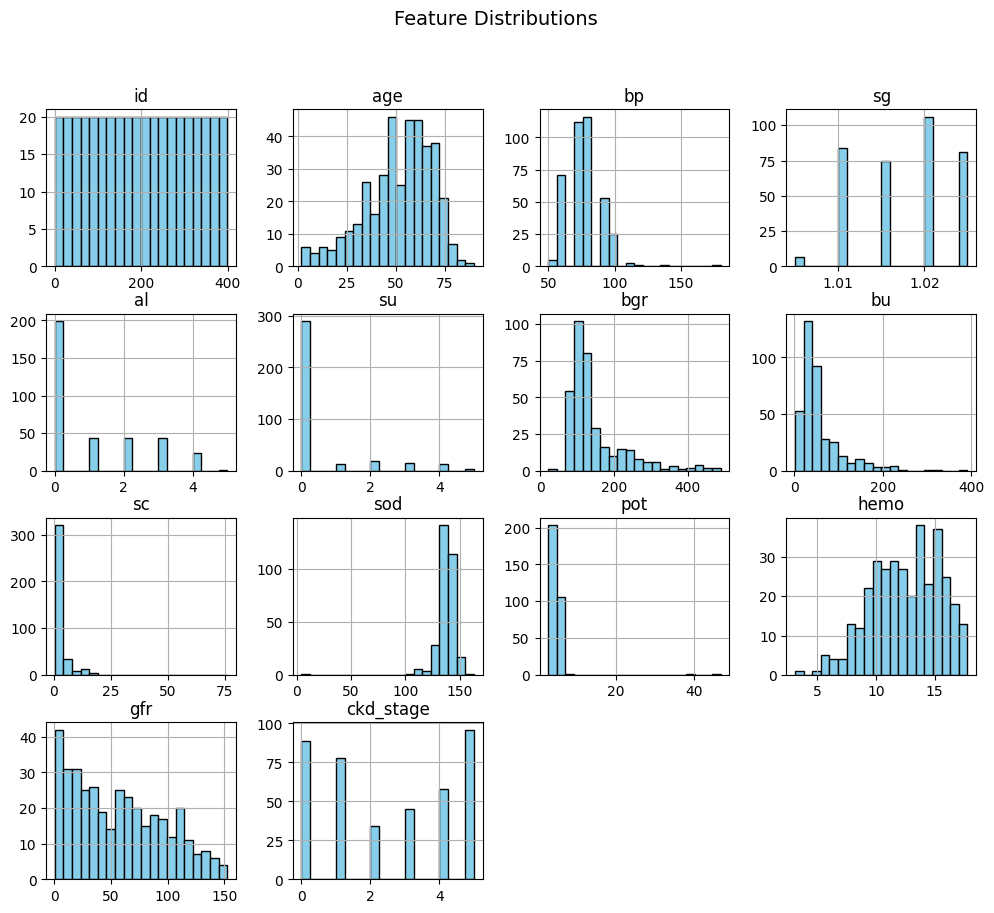

In [14]:
# Plot distributions of numerical features
df[numerical_features].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


 feature distribution plots reveal several key insights:  

1️⃣ **Outliers & Skewness**  
   - **Blood Glucose (`bgr`)**, **Serum Creatinine (`sc`)**, **Potassium (`pot`)**: Highly skewed with extreme values.  
   - **Albumin (`al`)**, **Sugar (`su`)**: Majority are **zero**, with discrete spikes.  

2️⃣ **Bimodal & Discrete Distributions**  
   - **Specific Gravity (`sg`)**: Appears bimodal, suggesting distinct patient groups.  
   - **CKD Stage (`ckd_stage`)**: Shows categorical behavior.  

3️⃣ **Normally Distributed Features**  
   - **Age (`age`)**, **Hemoglobin (`hemo`)**: Approximate normal distributions.  

### **Next Steps:**  
✔ Apply transformations (log, box-cox) to skewed variables (`bgr`, `sc`, `pot`).  
✔ Investigate outliers in `sc`, `bgr`, and `pot` to check for data errors.  
✔ Treat `al` and `su` as categorical rather than numerical.* 


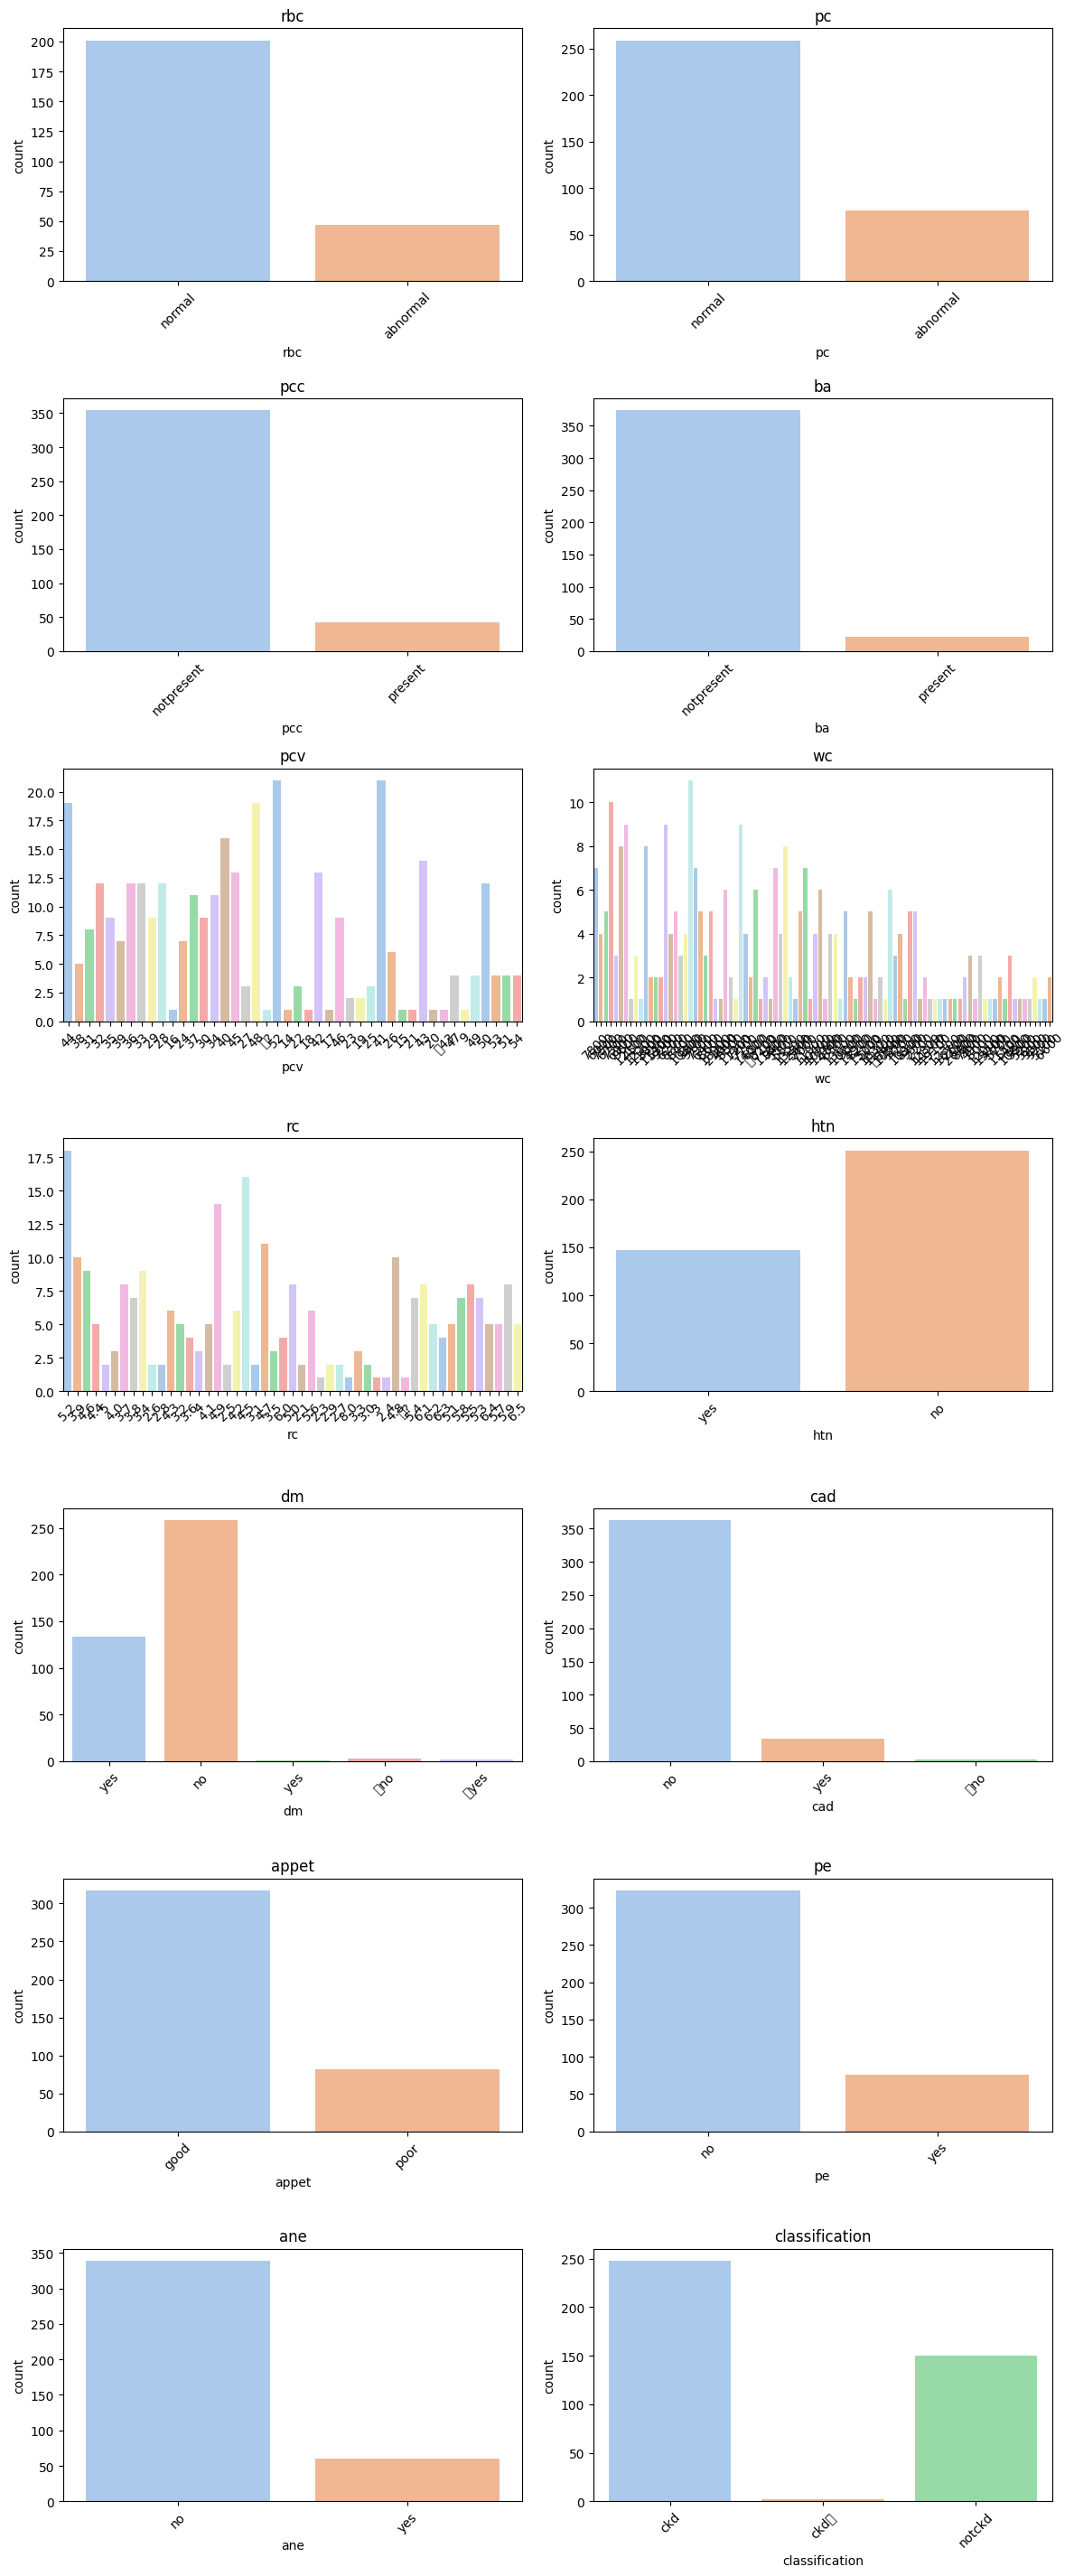

In [15]:
# Visualizing categorical features
plt.figure(figsize=(12, 32))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Your categorical feature distributions provide key observations:  

1️⃣ **Imbalanced Features**  
   - Red Blood Cells (`rbc`), Pus Cells (`pc`), Pus Cell Clumps (`pcc`), and Bacteria (`ba`):  
     - Majority of values are , indicating `imbalance`.  
   - Diabetes Mellitus (`dm`), Coronary Artery Disease (`cad`), Pedal Edema (`pe`), Anemia (`ane`):  
     - "No" dominates over "Yes".  

2️⃣ **Potential Data Issues**  
   - Diabetes Mellitus (`dm`) and Coronary Artery Disease (`cad`) contain inconsistent labels which need **cleaning**.  

3️⃣ **Classification Target (`classification`)**  
   - CKD cases outnumber Non-CKD cases**, but old CKD cases are extremely rare.  
   - merging "ckd" and "old ckd" into one class** for better model training.  

### **Next Steps:**  
✔ Clean categorical inconsistencies in `dm`, `cad` (e.g., "yes", "Yes", "y").  
✔ Balance categories where possible (e.g., via oversampling or SMOTE).  
✔ Consider re-grouping rare categories (`classification`).  


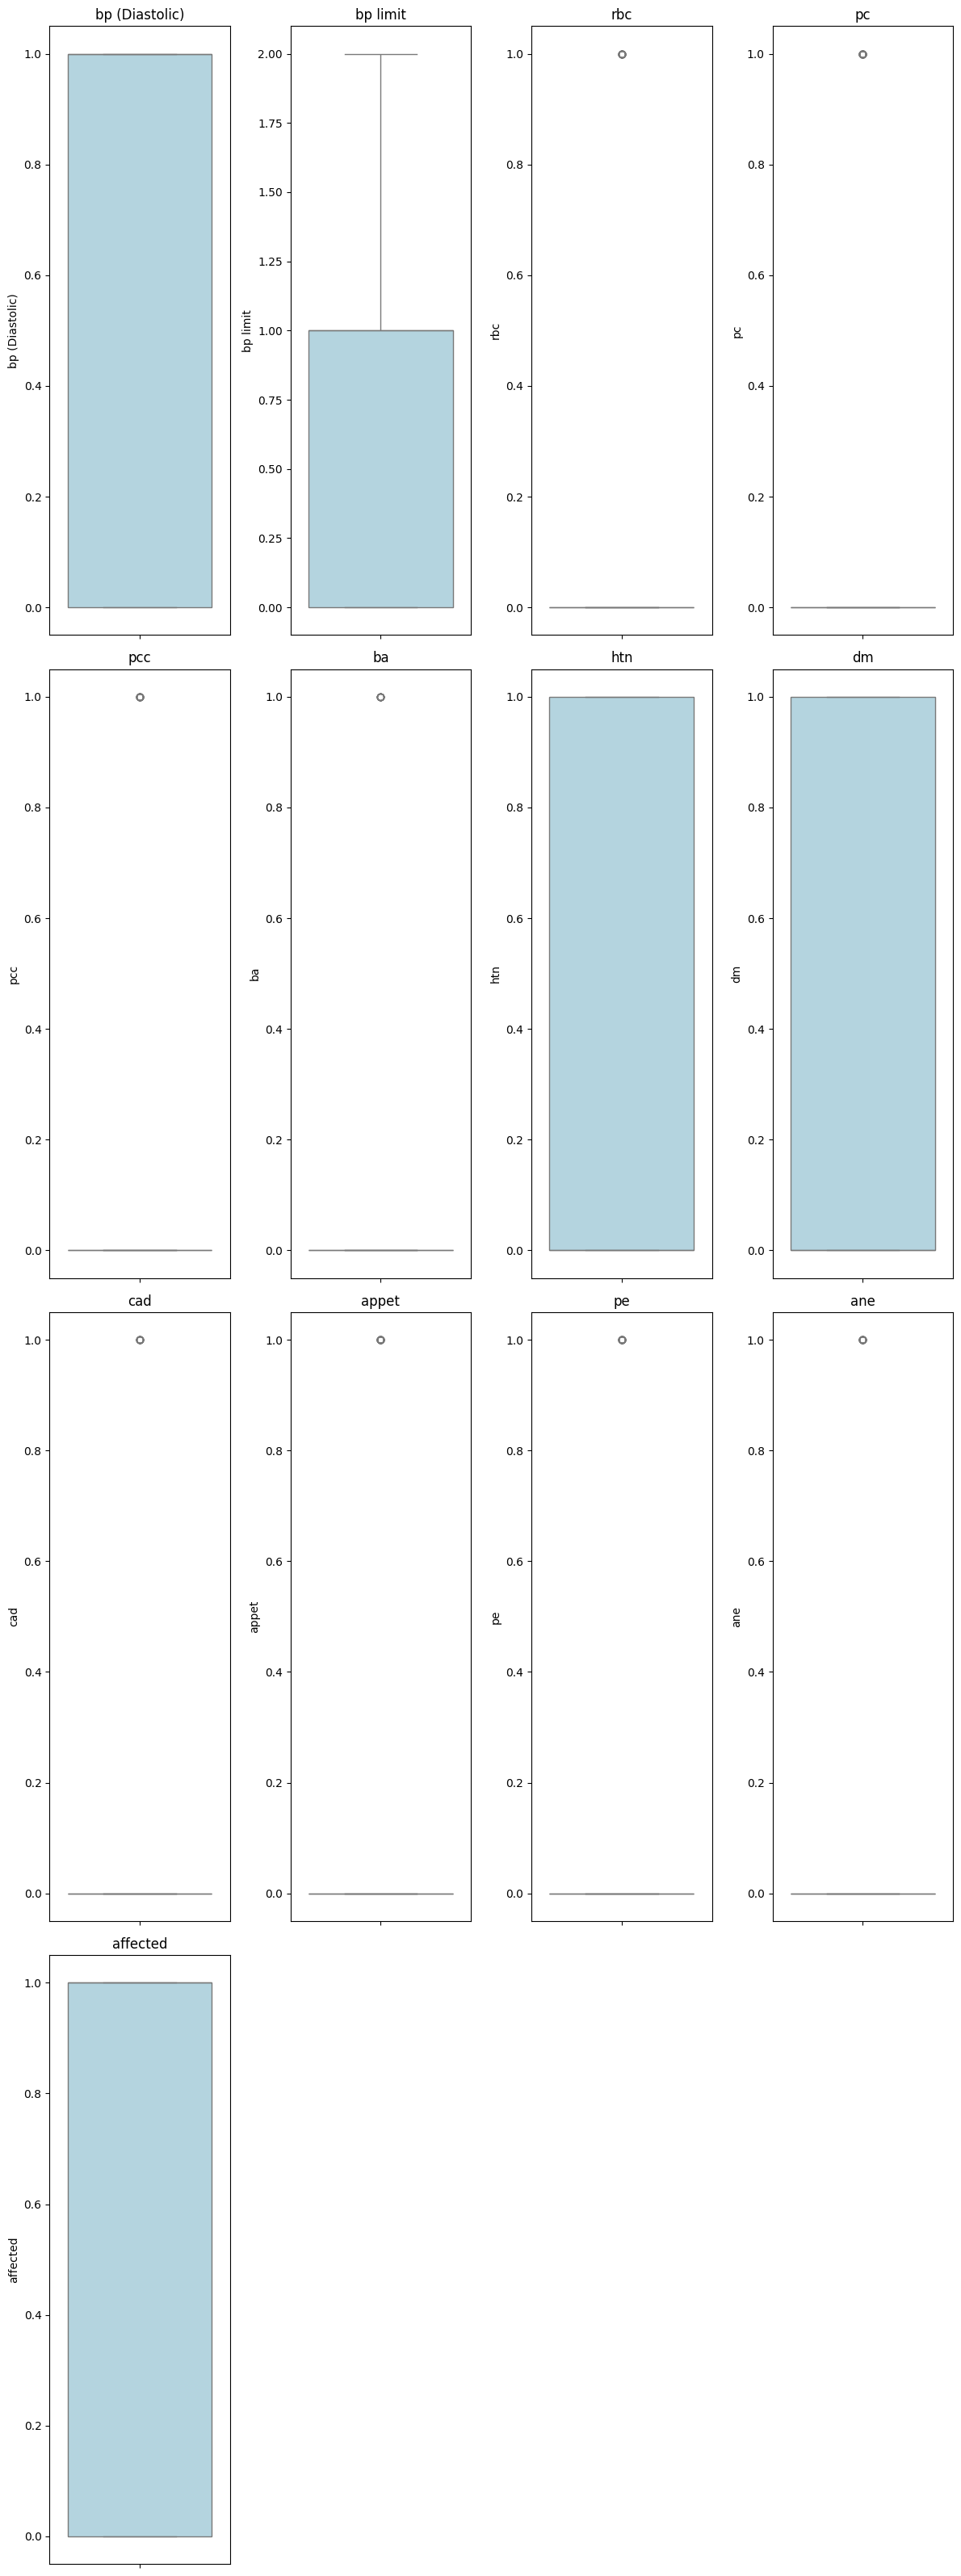

In [20]:
# outlier detection

plt.figure(figsize=(12, 32))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)
plt.tight_layout()
plt.show()


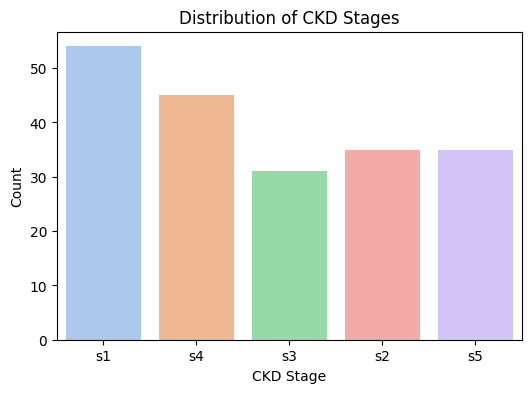

In [21]:
#  Checking Class Imbalance in Target Variable (stage)
plt.figure(figsize=(6,4))
sns.countplot(x=df["stage"], palette="pastel")
plt.title("Distribution of CKD Stages")
plt.xlabel("CKD Stage")
plt.ylabel("Count")
plt.show()


#### Correlation Analysis (Numerical Features vs. Target Variable)

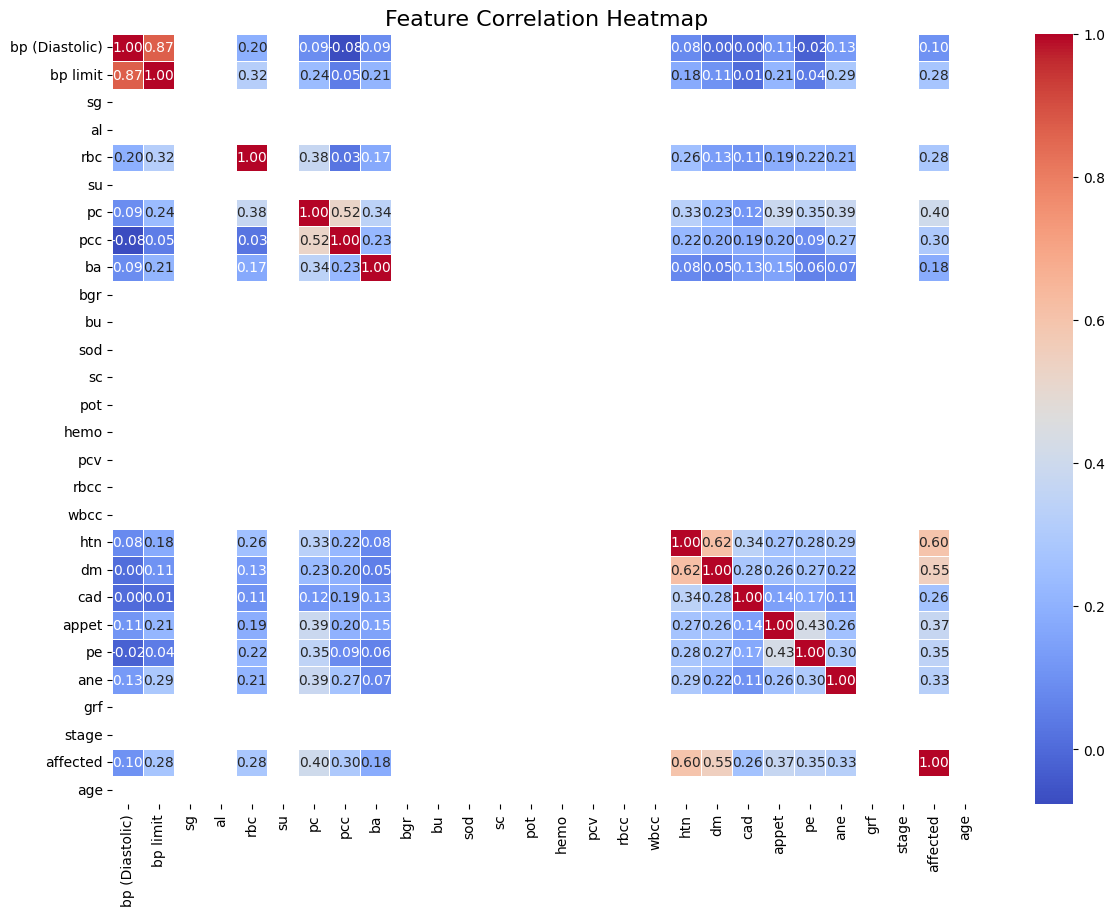

In [24]:
# Convert columns to numeric, if possible
df_cleaned = df.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix only on numeric columns
correlation_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))  # Increase figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


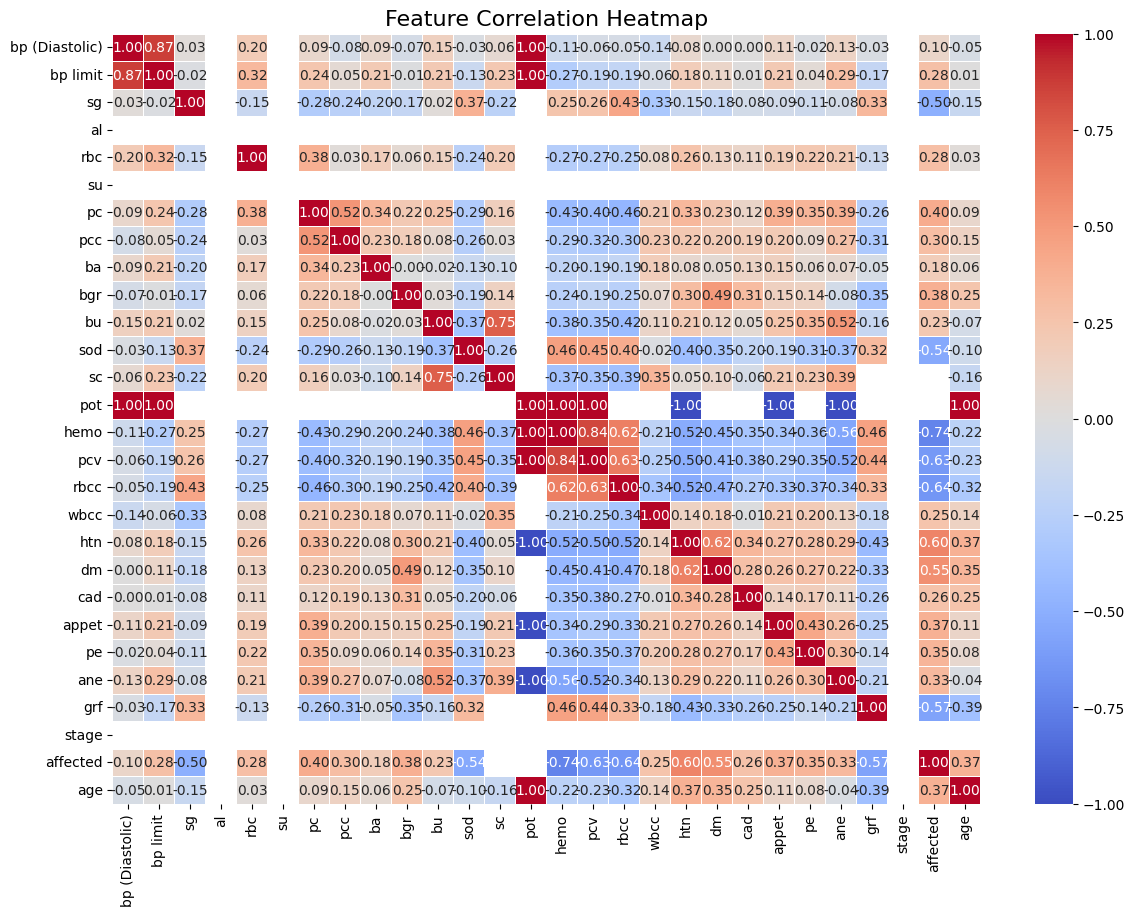

In [25]:
# Function to extract the average from a range string (like '1.019 - 1.021')
def extract_avg_range(value):
    try:
        if isinstance(value, str) and ' - ' in value:
            min_val, max_val = value.split(' - ')
            return (float(min_val) + float(max_val)) / 2
        else:
            return pd.to_numeric(value, errors='coerce')
    except:
        return pd.to_numeric(value, errors='coerce')

# Apply the function to all columns
df_cleaned = df.applymap(extract_avg_range)

# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

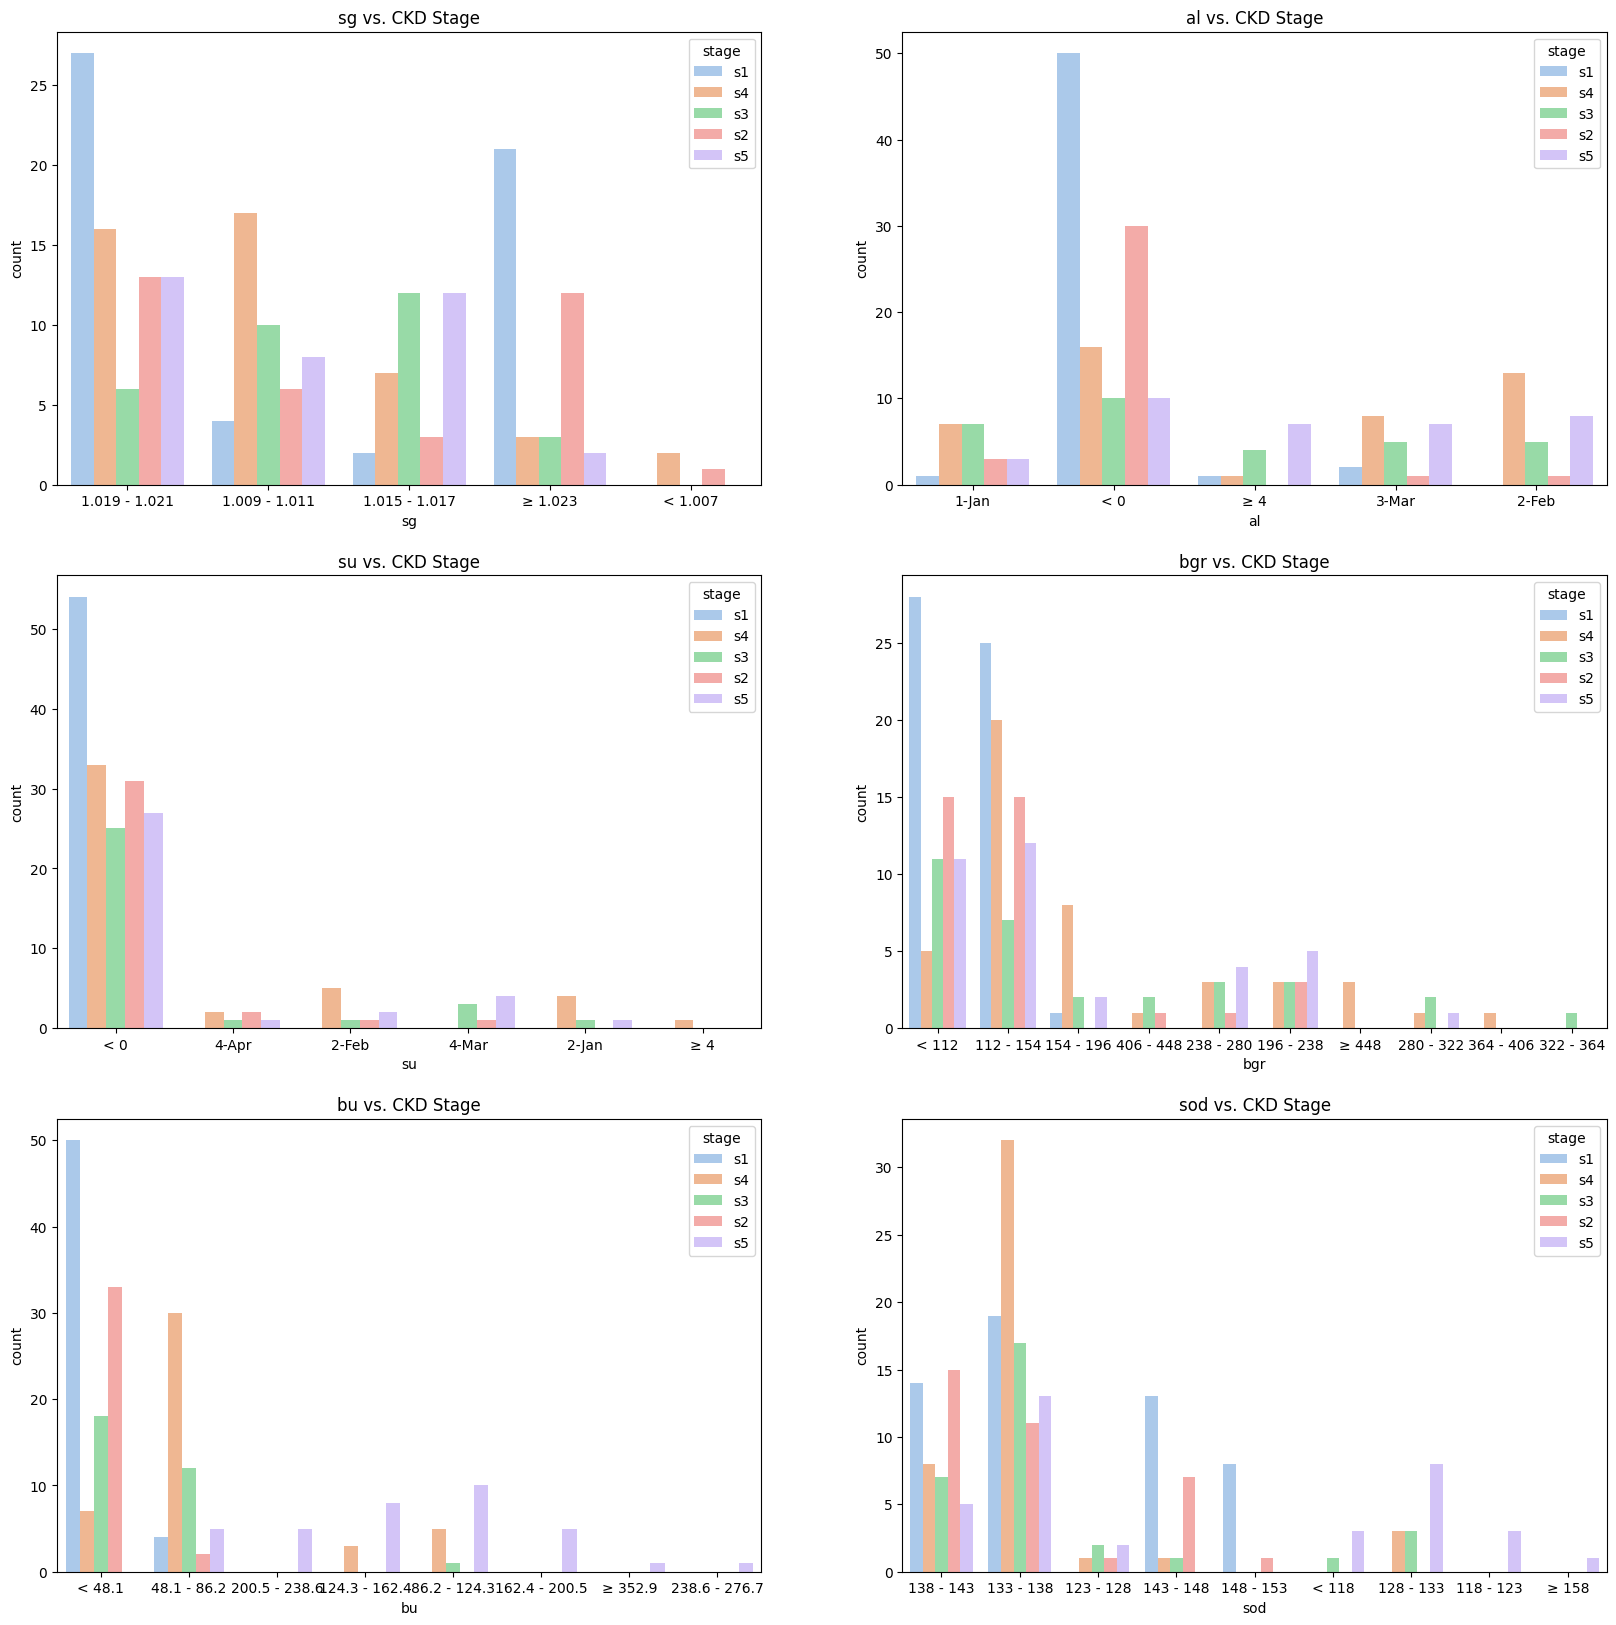

In [28]:


plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], hue=df["stage"], palette="pastel")
    plt.title(f"{col} vs. CKD Stage")
plt.legend(title="Stage")
plt.tight_layout()
plt.show()


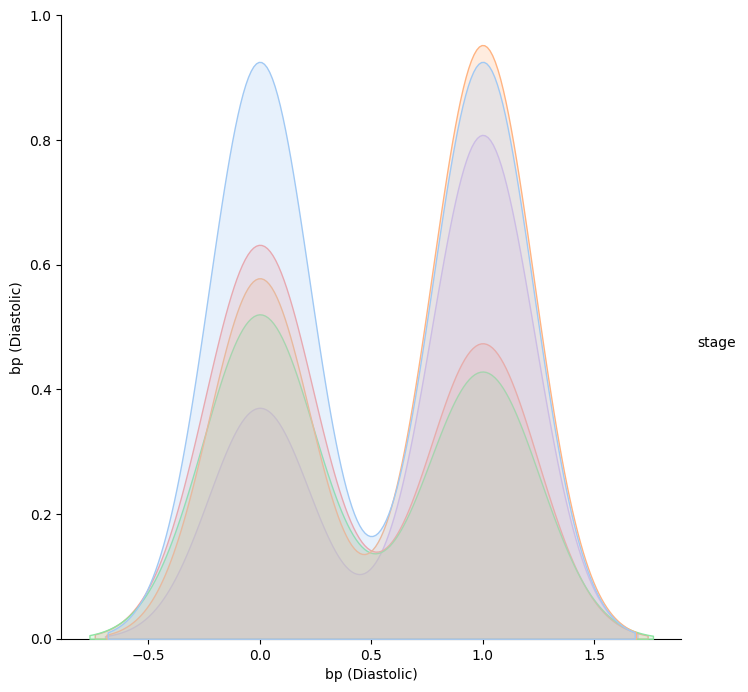

In [32]:
# Select key features for pairplot
selected_features = ['grf', 'sc', 'bgr', 'hemo', 'bp (Diastolic)', 'stage']

# Plot pairplot with increased size
sns.pairplot(df[selected_features], hue="stage", palette="pastel", diag_kind="kde", height=7)  # Increase height

plt.show()

## **3. Data Preparation**  
- Clean and preprocess data (handle missing values, outliers, and inconsistencies).  
- Convert categorical variables into numerical representations.  
- Normalize and scale continuous variables.  
- Integrate clinical and geographic exposure data into a structured dataset.  
- Split data into training and testing sets.

In [42]:
df.head(25)

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1-Jan,0,< 0,0,0,0,< 112,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3-Mar,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,20-Dec
5,1,1,≥ 1.023,< 0,0,< 0,0,0,0,< 112,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,20-Dec
6,0,0,1.019 - 1.021,3-Mar,0,< 0,0,0,0,< 112,...,1,1,0,0,0,0,177.612 - 202.778,s1,1,20-Dec
7,0,0,1.019 - 1.021,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,26.6175 - 51.7832,s4,1,20-Dec
8,0,0,≥ 1.023,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,26.6175 - 51.7832,s4,0,20 - 27
9,1,2,1.009 - 1.011,≥ 4,0,< 0,1,1,1,< 112,...,0,0,0,0,0,1,51.7832 - 76.949,s3,1,20 - 27


### Clean DF

In [50]:
df['bp (Diastolic)'].unique()

array([0, 1], dtype=int64)

- **0**: Indicates **normal diastolic blood pressure** (within the typical range).
- **1**: Indicates **abnormal or elevated diastolic blood pressure**


In [51]:
df['bp limit'].unique()

array([0, 1, 2], dtype=int64)


- **0**: Represents "normal" blood pressure. This would correspond to values under 120/80 mmHg.
- **1**: Represents "elevated" or "prehypertension." This includes blood pressure readings from 120-129 systolic and less than 80 diastolic.
- **2**: Represents "hypertension." This includes stage 1 (130-139 systolic or 80-89 diastolic) and stage 2 hypertension (140 systolic or higher or 90 diastolic or higher).

In this system, each value corresponds directly to a certain category or severity of blood pressure condition, with 0 being normal, 1 being elevated, and 2 indicating hypertension. This categorization helps in determining when medical attention or lifestyle changes are needed based on the blood pressure readings.

In [52]:
df['sg'].unique()

array(['1.019 - 1.021', '1.009 - 1.011', '1.015 - 1.017', '≥ 1.023',
       '< 1.007'], dtype=object)

The unique values in the dataframe represent specific ranges of **specific gravity** (SG), which is a measure used in medical contexts (especially in urinalysis) to assess the concentration of solutes in urine.


- **'1.019 - 1.021'**: This indicates a specific gravity range of **1.019 to 1.021**. It suggests that the concentration of solutes in the urine falls within this specific range.
- **'1.009 - 1.011'**: This indicates a specific gravity range of **1.009 to 1.011**, showing a lower concentration of solutes in the urine compared to the previous range.
- **'1.015 - 1.017'**: This represents a specific gravity range of **1.015 to 1.017**.
- **'≥ 1.023'**: This indicates that the specific gravity is **greater than or equal to 1.023**, meaning the urine has a higher concentration of solutes.
- **'< 1.007'**: This means the specific gravity is **less than 1.007**, which typically indicates very dilute urine with a low concentration of solutes.



In [ ]:

# Function to categorize SG based on the provided ranges
def categorize_sg(sg_value):
    if sg_value == '≥ 1.023':
        return 'Very High'
    elif sg_value == '< 1.007':
        return 'Very Low'
    elif '1.007' in sg_value and '1.009' in sg_value:
        return 'Low'
    elif '1.009' in sg_value or '1.015' in sg_value or '1.019' in sg_value:
        return 'Normal'
    elif '1.017' in sg_value or '1.021' in sg_value:
        return 'High'
    return 'SG'

# Apply the function to the 'sg' column
df['sg_category'] = df['sg'].apply(categorize_sg)

# Display the updated DataFrame
df.head(20)


,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,dm,cad,appet,pe,ane,grf,stage,affected,age,sg_category
0,0,0,1.019 - 1.021,1-Jan,0,< 0,0,0,0,< 112,...,0,0,0,0,0,≥ 227.944,s1,1,< 12,Normal
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,≥ 227.944,s1,1,< 12,Normal
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,...,0,0,1,0,0,127.281 - 152.446,s1,1,< 12,Normal
3,1,1,1.009 - 1.011,3-Mar,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,127.281 - 152.446,s1,1,< 12,Normal
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,1,0,1,1,0,127.281 - 152.446,s1,1,20-Dec,Normal
5,1,1,≥ 1.023,< 0,0,< 0,0,0,0,< 112,...,0,0,0,0,0,102.115 - 127.281,s1,0,20-Dec,Very High
6,0,0,1.019 - 1.021,3-Mar,0,< 0,0,0,0,< 112,...,1,0,0,0,0,177.612 - 202.778,s1,1,20-Dec,Normal
7,0,0,1.019 - 1.021,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,26.6175 - 51.7832,s4,1,20-Dec,Normal
8,0,0,≥ 1.023,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,26.6175 - 51.7832,s4,0,20 - 27,Very High
9,1,2,1.009 - 1.011,≥ 4,0,< 0,1,1,1,< 112,...,0,0,0,0,1,51.7832 - 76.949,s3,1,20 - 27,Normal


In [56]:
df['al'].unique()

array(['1-Jan', '< 0', '≥ 4', '3-Mar', '2-Feb'], dtype=object)

In [58]:
df.head(100)

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,dm,cad,appet,pe,ane,grf,stage,affected,age,sg_category
0,0,0,1.019 - 1.021,1-Jan,0,< 0,0,0,0,< 112,...,0,0,0,0,0,≥ 227.944,s1,1,< 12,Normal
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,≥ 227.944,s1,1,< 12,Normal
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,...,0,0,1,0,0,127.281 - 152.446,s1,1,< 12,Normal
3,1,1,1.009 - 1.011,3-Mar,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,127.281 - 152.446,s1,1,< 12,Normal
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,1,0,1,1,0,127.281 - 152.446,s1,1,20-Dec,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,< 26.6175,s4,1,51 - 59,Normal
96,1,1,1.019 - 1.021,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,177.612 - 202.778,s1,0,51 - 59,Normal
97,0,0,1.019 - 1.021,< 0,0,< 0,0,0,0,< 112,...,0,0,0,0,0,51.7832 - 76.949,s2,0,51 - 59,Normal
98,1,2,1.009 - 1.011,2-Feb,1,2-Jan,1,0,0,238 - 280,...,1,0,1,1,1,< 26.6175,s5,1,51 - 59,Normal


## **4. Modeling**  
- Select appropriate machine learning algorithms (e.g., Random Forest, XGBoost, SVM).  
- Train models using different techniques (e.g., supervised learning).  
- Optimize hyperparameters for improved performance.  
- Handle class imbalance (if necessary).  

## **5. Evaluation**  
- Assess model performance using metrics like accuracy, sensitivity, specificity, and ROC AUC.  
- Use cross-validation techniques to improve generalizability.  
- Compare multiple models to select the best-performing one. 

## **6. Deployment**  
- Prepare the model for real-world implementation.  
- Consider deploying the model via Streamlit, FastAPI, or a healthcare dashboard.  
- Ensure model interpretability for healthcare professionals.  
- Discuss ethical considerations and recommendations for future use. 